In [1]:
from pathlib import Path
from utils import reproject_tiff, vis_tiff
import glob, os, rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
tiffs = ["anwr", "ivotuk_north", "ivotuk_south", "prudhoebay"]
shps = ["ANWR_small.shp", "Ivotuk_north_small.shp", "Ivotuk_south_small.shp", "PrudhoeBay_small.shp"]

### CRS Confirmation

region: anwr, TIFF CRS: EPSG:26906
SHP CRS: EPSG:26906
region: ivotuk_north, TIFF CRS: EPSG:26904
SHP CRS: EPSG:26904
region: ivotuk_south, TIFF CRS: EPSG:26904
SHP CRS: EPSG:26904
region: prudhoebay, TIFF CRS: EPSG:26905
SHP CRS: EPSG:26905


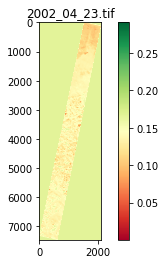

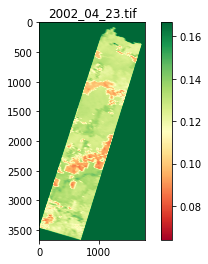

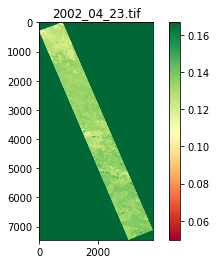

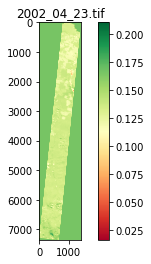

In [3]:
for i in range(len(tiffs)):
    DATA_DIR = Path(f"/datadrive/MODIS_NDVI_Alaska/modis/tiffs/{tiffs[i]}")
    SHAPEFILE_DIR = Path(f"/datadrive/MODIS_NDVI_Alaska/modis/shps/ROI_small/{shps[i]}")
    files = glob.glob(str(DATA_DIR / "*"))
    files.sort()
    label = gpd.read_file(SHAPEFILE_DIR)
    dst_crs = rasterio.crs.CRS.from_string(str(label.crs))
    print(f"region: {tiffs[i]}, TIFF CRS: {rasterio.open(files[1]).crs}")
    print(f"SHP CRS: {dst_crs}")
    vis_tiff(files[50], vflip=True)